# Modeling a Perceptron

To show the behavior of a perceptron, we will use a very simple one: a perceptron with a Heavyside activation function.

In [104]:
%matplotlib inline
import numpy as np
import pandas as pd
import inspect
import matplotlib.pyplot as plt

from perceptron import Perceptron
plt.style.use('ggplot')

In [2]:
print inspect.getsource(Perceptron)

class Perceptron:
    
    def __init__(self, num_inputs, activation_threshold):
        self.num_inputs = num_inputs
        self.activation_threshold = activation_threshold
        self.inputs = np.zeros(self.num_inputs)
        self.weights = np.random.rand(self.num_inputs)

    def __repr__(self):
        return "len inputs {}, act threshold {}, weights {}".format(
            self.num_inputs, self.activation_threshold, self.weights
        )

    def feed_forward(self, inputs):
        return np.sum(inputs * self.weights)
    
    def activation_function(self, value):
        if value > self.activation_threshold:
            return 1
        return 0

    def activate_neuron(self, inputs):
        value = self.feed_forward(inputs)
        return self.activation_function(value)

    def train(self, inputs, target):
        attempt = self.activate_neuron(inputs)
        error = target - attempt
        self.weights += inputs * error 



In [4]:
inputs = np.array([0.2, 12.2,0.98])
pc = Perceptron(len(inputs), 0.5)

The perceptron was initialized with random weights to start. 

In [5]:
pc

len inputs 3, act threshold 0.5, weights [ 0.76349258  0.53690166  0.88699145]

## The training data

Let's assume that we want to use our perceptron to check if a pair (x,y) is above a line. Let's define the line as 

```
f(x) = -2*x+10
```

In [55]:
def f(x):
    return -2.*x + 10.

In [57]:
x = np.array([1,3,7,4])
y = f(x_arr)

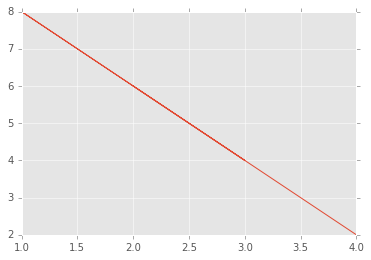

In [105]:
plt.plot(x,y)

In [121]:
y_test = np.random.randint(1,10,4)
y_test

array([7, 2, 4, 6])

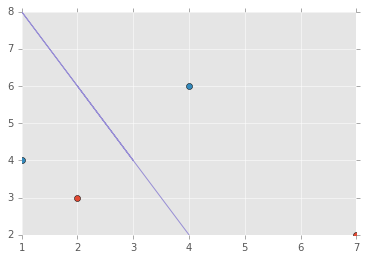

In [122]:
fig, axs = plt.subplots()
axs.plot(*zip(x, y_test), marker='o', ls='')
axs.plot(x,y)
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["left"].set_visible(False)
axs.spines["bottom"].set_visible(False)

In [125]:
training_data = (y < y_test).astype(int)
training_data

array([1, 0, 0, 1])

In [126]:
x, y_test, training_data

(array([2, 3, 1, 4]), array([7, 2, 4, 6]), array([1, 0, 0, 1]))

In [129]:
df = pd.DataFrame({'x':x, 'y':y_test, 'target':training_data})

In [130]:
df

,target,x,y
0,1,2,7
1,0,3,2
2,0,1,4
3,1,4,6


In [138]:
pc.train(np.array([1.0, x[0], y_test[0]]), training_data[0])

In [140]:
pc

len inputs 3, act threshold 0.5, weights [ 0.76349258  0.53690166  0.88699145]

In [142]:
for i in xrange(4):
    pc.train(np.array([1.0, x[i], y_test[i]]), training_data[i])

In [143]:
pc

len inputs 3, act threshold 0.5, weights [ 0.76349258  1.53690166  4.88699145]

In [144]:
for i in xrange(4):
    pc.train(np.array([1.0, x[i], y_test[i]]), training_data[i])

In [145]:
pc

len inputs 3, act threshold 0.5, weights [-0.23650742  1.53690166  4.88699145]